<a href="https://colab.research.google.com/github/GraceChen996/TensorFlowLearningNote/blob/branch1/ReinforcementLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#基本概念



+ 环境（Environment）：智能体探索的事物
+ 智能体（Agent）：探索环境的实体，智能体会在环境中采取不同的动作。
+ 状态（State）：智能体在任何时刻都处于某种状态下，状态能简单描述智能体的状况。
+ 动作（Action）：智能体和环境的交互被称作动作，动作可能会也可能不会改变智能体的状态。
+ 奖励（Reward）：智能体所采取的每个动作都会带来一个奖励（可能是正的也可能是负的）。智能体的目标就是将它从环境中获得的奖励最大化
<br><br>
强化学习中最重要的部分就是决定如何给智能体提供奖励


#Q-learning

Q-learning是机器学习中用于学习“动作-奖励”矩阵的一种技术，Q-learning学习到的矩阵通常被称为Q表或者Q矩阵
<br>
<br>
Q-learning算法定义了更新矩阵中的值的方法，并且对智能体在每个状态下采取什么行动做出决策
<br>
<br>
在成功的训练/学习后，我们通过Q表决定在任意状态下智能体应当采取的动作


##学习Q表

1. **将Q表内容初始化为0**
2. **智能体探索环境并观察每个动作的奖励**，探索的策略有如下两种：
  + 随机选择一个可行的动作
  + 使用目前的Q表去寻找最佳的动作

  在智能体学习的前期，为了获取更多的状态和对环境进行更多的探索，更有可能采取随机的动作。随着学习过程的推进,智能体将逐渐更加依赖它所学到的Q表。这就意味着当智能体越多地探索环境时，它就会对环境产生更好的理解，并且采取更佳动作的频率也会越高。
<br>
<br>
对于智能体来说，它需要上述两种探索策略中进行平衡，以此来确保自己不会陷入局部最优解
<br>
3. **更新Q值**。用于更新Q值的公式如下图所示：
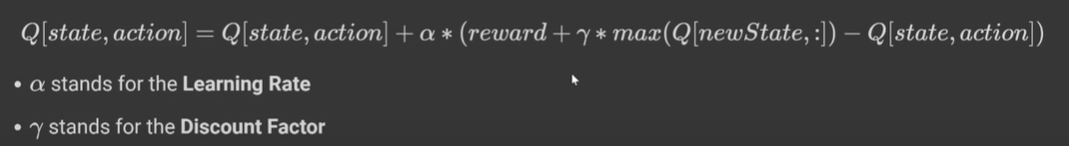

##Q-Learning 案例

In [23]:
import gym #如果在自己电脑上跑需要pip install gym
!pip install pygame

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
env = gym.make("FrozenLake-v1")

In [25]:
print(env.observation_space.n) #状态数量
print(env.action_space.n) #每一个状态下可以采取的动作数量

16
4


In [4]:
env.reset() #重置环境回到默认状态

0

In [27]:
action = env.action_space.sample() #获取随机动作
print(action) #查看动作

3


In [6]:
new_state,reward,done,info = env.step(action) #采取动作，并查看其返回的信息
#new_state:进入的下一个状态
#reward:采取动作获得的奖励
#done:告知是否达到终点，如果done的值为true就需要重置环境了

In [7]:
env.render() #为环境提供GUI

/usr/local/lib/python3.7/dist-packages/gym/core.py:50: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  "You are calling render method, "


error: ignored

###建立Q表

In [16]:

import gym
import numpy as np
import time

env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


In [17]:
Q = np.zeros((STATES,ACTIONS))
print(Q)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


###常量定义

In [19]:
EPISODES = 10000 #迭代次数
MAX_STEPS = 100 #每次运行最多允许采取的步数
LEARNING_RATE = 0.81
GAMMA = 0.96
RENDER = False

### 选择动作

In [14]:
epsilon = 0.9 #有百分之九十的机会会采取随机动作
#code to pick action
if np.random.uniform(0,1)< epsilon:
  action = env.action_space.sample()
else:
  action = np.argmax(Q[state,:])

###更新Q值

In [18]:
Q[state,action] = Q[state,action]+LEARNING_RATE*(reward + GAMMA * np.max(Q[new_state,:]) - Q[state,action])

NameError: ignored

###完整过程

In [53]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES,ACTIONS))

EPISODES = 1500 #迭代次数
MAX_STEPS = 100 #每次运行最多允许采取的步数

LEARNING_RATE = 0.81
GAMMA = 0.96
RENDER = False


epsilon = 0.9 #有百分之九十的机会会采取随机动作

rewards = []
for episode in range(EPISODES):
  state = env.reset()
  for _ in range(MAX_STEPS):

    if RENDER:
      env.render()

    if np.random.uniform(0,1) < epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state, :])

    next_state,reward,done,_=env.step(action)

    Q[state,action] = Q[state,action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[new_state,:]) - Q[state,action])

    state = next_state

    if done:
      rewards.append(reward)
      epsilon -= 0.001
      break

print(Q)
print(f"Average reward:{sum(rewards)/len(rewards)}:")



0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


KeyboardInterrupt: ignored

In [43]:
import matplotlib.pyplot as plt
def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0,len(rewards),100):
  avg_rewards.append(get_average(rewards[i:i+100]))

<>:3: DeprecationWarning: invalid escape sequence \s


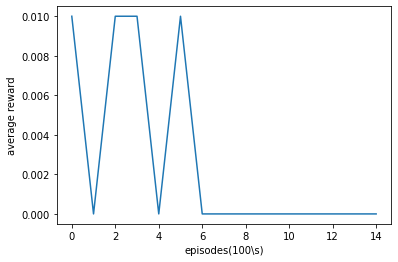

In [44]:
plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes(100\s)')
plt.show()